# Exercise 3 : Multi-layer Networks with Keras

### MNIST

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

Load MNIST dataset

In [2]:
(trainX, trainY), (testX, testY) = mnist.load_data()

Modify data to train in MLP model
* Change value range from 0 to 1
* Change data shape to one dimension

In [3]:
trainX.shape

(60000, 28, 28)

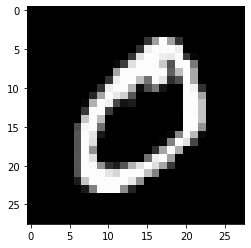

In [4]:
plt.imshow(trainX[1], cmap='gray')

In [5]:
trainX = trainX/255.0;
testX = testX/255.0;
trainX = trainX.reshape(-1, 28*28);
testX = testX.reshape(-1, 28*28);

Change label to one-hot encoder

In [6]:
trainY = to_categorical(trainY);
testY = to_categorical(testY);

Define the 784-256-128-10 architecture using Keras

In [7]:
model = Sequential()

In [8]:
model.add(Dense(256, activation="sigmoid", input_shape=(784,)))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


Train the model usign SGD

In [9]:
sgd = SGD(0.01)
model.compile(loss= 'categorical_crossentropy' , 
              optimizer=sgd,
              metrics=["accuracy"])

In [10]:
H = model.fit(trainX, trainY, validation_data=(testX, testY), 
              epochs=100, batch_size=64, verbose=1)

Epoch 1/100
938/938 [==============================] - 3s 3ms/step - loss: 2.2394 - accuracy: 0.2880 - val_loss: 2.1576 - val_accuracy: 0.5489
Epoch 2/100
938/938 [==============================] - 3s 3ms/step - loss: 2.0425 - accuracy: 0.5386 - val_loss: 1.8838 - val_accuracy: 0.5933
Epoch 3/100
938/938 [==============================] - 3s 3ms/step - loss: 1.6760 - accuracy: 0.6396 - val_loss: 1.4442 - val_accuracy: 0.6967
Epoch 4/100
938/938 [==============================] - 3s 3ms/step - loss: 1.2717 - accuracy: 0.7220 - val_loss: 1.1026 - val_accuracy: 0.7516
Epoch 5/100
938/938 [==============================] - 3s 3ms/step - loss: 1.0002 - accuracy: 0.7708 - val_loss: 0.8908 - val_accuracy: 0.7988
Epoch 6/100
938/938 [==============================] - 3s 3ms/step - loss: 0.8290 - accuracy: 0.8052 - val_loss: 0.7513 - val_accuracy: 0.8231
Epoch 7/100
938/938 [==============================] - 2s 3ms/step - loss: 0.7128 - accuracy: 0.8281 - val_loss: 0.6543 - val_accuracy: 0.8421

Evaluate the trained network

In [11]:
model.evaluate(testX, testY, batch_size=64)

157/157 [==============================] - 0s 2ms/step - loss: 0.2002 - accuracy: 0.9421


[0.20019176602363586, 0.9420999884605408]

In [12]:
predictions = model.predict(testX, batch_size=64)

Use `classification_report` to measure the performance of your model.

In [13]:
print(classification_report(testY.argmax(axis=1), 
                            predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.94      0.93      0.94      1032
           3       0.93      0.94      0.93      1010
           4       0.94      0.94      0.94       982
           5       0.93      0.91      0.92       892
           6       0.94      0.95      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.92      0.92      0.92       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



Plot the training loss and accuracy

In [14]:
H.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

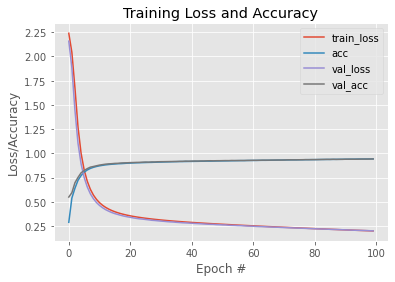

In [15]:
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="acc")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()